
### **Data Science**
Comisión 29800

Estudiante: Alejandro E. Leguizamón


> # **ENTRENAMIENTO Y TESTEO**: *Pruebas realizadas durante el trabajo final*

# **CONTAMINACIÓN EN EE. UU. 2000-2021** 🏭


## **DATA ACQUISITION Y DATA WRANGLING**
**VER TRABAJO FINAL PARA EXPLORAR DETALLE DE ESTA ETAPA**

In [ ]:
#Importamos las librerías a utilizar en esta primera instancia del proyecto. 

import requests # Libreria para obtener el contenido de una web o para realizar una petición a un API.
import json #Libreria para lectura archivos json
import matplotlib as mpl #Librería gráfica de python estándar y la más conocida
import matplotlib.pyplot as plt
plt.style.use('ggplot') #Estilo de graficas
import seaborn as sns #Librería gráfica basada en matplotlib, especializada en la visualización de datos estadísticos
import pandas as pd #Librerías más útil para los científicos de datos. Las estructuras de datos principales en pandas son Series para datos en una dimensión y DataFrame para datos en dos dimensiones.
import numpy as np #Proporciona una estructura de datos universal que posibilita el análisis de datos y el intercambio de datos entre distintos algoritmos
import bokeh  #Librería para visualizar datos de forma interactiva en un navegador web
from bokeh.io import output_notebook, show, reset_output 
from bokeh.models import ColumnDataSource, FactorRange, CategoricalColorMapper 
from bokeh.plotting import figure 
from bokeh.models import HoverTool 

#A medida que avancemos se irán importando otras librerías puntuales para el problema a desarrollar.

In [ ]:
url = 'https://raw.githubusercontent.com/leguizamonae/Pollution/main/pollution_2000_2021.csv' #Dataset original 
pollution= pd.read_csv(url,sep=',')

url2 = 'https://raw.githubusercontent.com/leguizamonae/Pollution/main/pollution2.csv' #Importamos Dataset generado y cargado en Github
pollution2= pd.read_csv(url2,sep=',')

pollution = pd.concat([pollution, pollution2],axis=0)  #Concatenamos ambos dataframe

url = 'https://raw.githubusercontent.com/leguizamonae/Pollution/main/coordenadas.csv' #Importamos Dataset de coordenadas
coordenadas= pd.read_csv(url,sep=',')

for Address in coordenadas.Address.unique(): 
    ind = pollution.loc[pollution.Address==Address].index
    pollution.loc[ind, 'Latitude'] = coordenadas.loc[coordenadas.Address==Address].Latitude.iloc[0]
    pollution.loc[ind, 'Longitude'] = coordenadas.loc[coordenadas.Address==Address].Longitude.iloc[0] #Asignamos las coordenadas faltantes a las direcciones 

### **LIMPIEZA Y TRATAMIENTO DE VALORES NULO Y VALORES ATIPICOS**

In [ ]:
for i in pollution['O3 Mean']:
    x = float(i)
    if x < 0:
        pollution['O3 Mean'] = pollution['O3 Mean'].replace([i],0.028477)

In [ ]:
for i in pollution['CO Mean']:
    x = float(i)
    if x < 0:
        pollution['CO Mean'] = pollution['CO Mean'].mask(pollution['CO Mean'].lt(0)).ffill().fillna(0).astype('float')

In [ ]:
for i in pollution['CO 1st Max Value']:
    x = float(i)
    if x < 0:
        pollution['CO 1st Max Value'] = pollution['CO 1st Max Value'].mask(pollution['CO 1st Max Value'].lt(0)).ffill().fillna(0).astype('float')

In [ ]:
for i in pollution['SO2 Mean']:
    x = float(i)
    if x < 0:
        pollution['SO2 Mean'] = pollution['SO2 Mean'].mask(pollution['SO2 Mean'].lt(0)).ffill().fillna(0).astype('float')

In [ ]:
for i in pollution['SO2 1st Max Value']:
    x = float(i)
    if x < 0:
        pollution['SO2 1st Max Value'] = pollution['SO2 1st Max Value'].mask(pollution['SO2 1st Max Value'].lt(0)).ffill().fillna(0).astype('float')

In [ ]:
for i in pollution['NO2 Mean']:
    x = float(i)
    if x < 0:
        pollution['NO2 Mean'] = pollution['NO2 Mean'].mask(pollution['NO2 Mean'].lt(0)).ffill().fillna(0).astype('float')

In [ ]:
for i in pollution['NO2 1st Max Value']:
    x = float(i)
    if x < 0:
        pollution['NO2 1st Max Value'] = pollution['NO2 1st Max Value'].mask(pollution['NO2 1st Max Value'].lt(0)).ffill().fillna(0).astype('float')

### **CREACION DE NUEVAS VARIABLES**

In [ ]:
pollution['Cumulative_AQI'] = pollution['O3 AQI'] + pollution['CO AQI'] + pollution['SO2 AQI'] + pollution['NO2 AQI'] 
#Se crea nueva columna con una nueva medida

In [ ]:
pollution['Cumulative_AQI']=pollution['Cumulative_AQI'].astype('int16')

In [ ]:
# Se crea nueva columna para categorizar valores de AQI
conditionlist = [
    (pollution['Cumulative_AQI'] > 0) & (pollution['Cumulative_AQI'] <= 50), 
    (pollution['Cumulative_AQI'] >= 51) & (pollution['Cumulative_AQI'] <= 100), 
    (pollution['Cumulative_AQI'] >= 101) & (pollution['Cumulative_AQI'] <= 150), 
    (pollution['Cumulative_AQI'] >= 151) & (pollution['Cumulative_AQI'] <= 200), 
    (pollution['Cumulative_AQI'] >= 201) & (pollution['Cumulative_AQI'] <= 300), 
    (pollution['Cumulative_AQI'] >= 301)]

choicelist = ['Buena', 'Moderada', 'Dañina a la salud para grupos sensibles', 'Dañina a la salud', 'Muy dañina a la salud', 'Peligrosa']

pollution['Nivel_AQI'] = np.select(conditionlist, choicelist)

Antes de aplicar un algoritmo de ML necesitamos preparar las variables, tanto dependientes como independientes, para que nuestro modelo pueda aplicarse correctamente. 

### **ENCODING**

Primero, preparemos nuestra variable a predecir identificando los distintos valores existentes y sustituyendo cada uno de ellos por un número, enfoque denominado **LABEL ENCODER**. 

Esta técnica de trasformación de datos es muy importante para aplicar un algoritmo de ML.


Por lo tanto, cramos la columna *Target* y aplicamos dicha técnicas. 

Target  | Nivel_AQI
-------------------|------------------
 0  |	Buena
 1	|Moderada
 2	|Dañina a la salud para grupos sensibles
 3  |Dañina a la salud
 4	|Muy dañina a la salud
 5	|Peligrosa


In [ ]:
# Se crea columna Target para clasificar niveles 
Target = {'Buena':0, 'Moderada':1, 'Dañina a la salud para grupos sensibles':2,  'Dañina a la salud':3, 'Muy dañina a la salud':4, 'Peligrosa':5}
pollution['Target'] = pollution['Nivel_AQI'].map(Target)

In [ ]:
pollution['Target'].unique() #Verificamos valores unicos en la columna Target

array([2, 1, 3, 4, 0, 5])

In [ ]:
pollution.query('Target==0')[['Cumulative_AQI','Nivel_AQI']] # Verificamos que la codificación se hizo bien

,Cumulative_AQI,Nivel_AQI
125,48,Buena
481,44,Buena
795,45,Buena
796,45,Buena
797,39,Buena
...,...,...
9719,46,Buena
9720,39,Buena
9721,36,Buena
9722,39,Buena


In [ ]:
pollution['Target'].isnull().values.any() # Verificamos si existen valores nulos en el DataFrame.

False

In [ ]:
pollution.Target.value_counts() # Realizamos conteo de clases

1    356237
0    168707
2     72716
3     15918
4      4730
5       115
Name: Target, dtype: int64

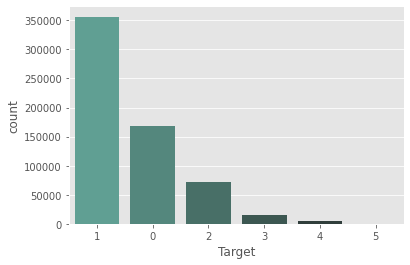

In [ ]:
sns.countplot(x =pollution.Target , data = pollution, order = pollution['Target'].value_counts().index, palette = "dark:#5A9_r")

La muestra esta desbalanceada respecto a las clases. 

Mas adelante al aplicar nuestros algoritmos de clasificacion utilizaremos la tecnica SMOTE para dicha desbalance. 


## **ENTRENAMIENTO Y TESTEOS REALIZADOS DURANTE EL TRABAJO** 🧪

A continuacion se detallan todas las rondas de entrenamiento realizadas a lo largo del trabajo para encontrar el mejor modelo y la mejor configuración

### **PRIMERA RONDA**: ENTRENAMIENTO CON 4 VARIABLES 

En esta primera ronda realizaremos el entrenamiento de nuestros modelos utilizando las 4 variables obtenidas en nuestro feature selection.

* O3 Mean
* CO Mean
* SO2 Mean
* NO2 Mean

#### **Modelo 1: DECISION TREE CLASSIFIER** 🌳

Para comenzar con nuestro problema de clasificacion se inicio ejecutando un algoritmo de DecisionTreeClassifier con las variables finales obtenidas de nuestro Feature Selection.

In [ ]:
from sklearn.tree import DecisionTreeClassifier #Modelo que vamos a utilizar: Arbol de Desicion 
from sklearn.model_selection import train_test_split # Lo utilizamos para dividir los datos en subconjuntos aleatorios de entrenamiento y test.
from sklearn import metrics # Lo vamos a utilizar para valuar la calidad de las predicciones de un modelo:
from sklearn.metrics import accuracy_score as acc #Para medir la precisión del subconjunto

In [ ]:
#Dividimos nuesteas variables en X e y 
X= pollution[['O3 Mean','CO Mean','SO2 Mean','NO2 Mean']] 
y= pollution.Target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.90, random_state=7) # Separamos en entrenamiento/test en razon 10/90 %

print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (61842, 4) (61842,)
Testing dataset shape: (556581, 4) (556581,)


Al tener una base de datos con varios registros se separa el dataset en:

* 10% Entrenamiento
* 90% Test

Al tener varios registros en nuestro dataset, nos permiten hacer esta separación y dejar la mayoria de los datos para realizar test de nuestros modelos. 

In [ ]:
modelo1 = DecisionTreeClassifier(random_state=7,criterion='entropy')  # Se utiliza como modelo clasificador un Arbol de decisión
modelo1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=7)

In [ ]:
# precisión del modelo en datos de entrenamiento.
print("Precisión entranamiento: {0: .2f}".format(
        modelo1.score(X_train, y_train)))

Precisión entranamiento:  1.00


Logramos una precisión del 100 %. Veamos como se comporta con los datos de evaluación

In [ ]:
# precisión del modelo en datos de evaluación.
print("Precisión evaluación: {0: .2f}".format(
        modelo1.score(X_test, y_test)))

Precisión evaluación:  0.73


Ahora nuestro modelo ya no se muestra tan preciso. Lo cual nos esta diciendo que nuestro modelo está sobreajustado, ya que dejamos crecer el árbol hasta que cada hoja estuviera pura (es decir que solo contenga datos de una sola de las clases a predecir). Una alternativa para reducir el sobreajuste y ver si podemos lograr que generalice mejor y por tanto tenga más precisión para datos nunca vistos, es tratar de reducir la complejidad del modelo por medio de controlar la profundidad que puede alcanzar el Árbol de Decisión.

In [ ]:
# Profundidad del arbol de decisión.
modelo1.tree_.max_depth

35

Con el objetivo de identificar la profundidad óptima que consigue reducir la varianza y aumentar la capacidad predictiva del modelo, se somete al árbol a un proceso de pruning.

Este caso nuestro modelo tiene una profundidad de 35 nodos; veamos si reduciendo esa cantidad podemos mejorar la precisión en los datos de evaluación. Por ejemplo, pongamos un máximo de profundidad de 20 nodos.

In [ ]:
modelo1 = DecisionTreeClassifier(random_state=7,criterion='entropy', max_depth=20) # Modelo clasificador Arbol de decisión con control de profundiad de 20 nodos
modelo1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=7)

In [ ]:
print("Precisión evaluación: {0: .2f}".format(
        modelo1.score(X_train, y_train)))

Precisión evaluación:  0.97


In [ ]:
print("Precisión evaluación: {0: .2f}".format(
        modelo1.score(X_test, y_test)))

Precisión evaluación:  0.74


Ahora podemos ver que ya no tenemos un modelo con 100% de precisión en los datos de entrenamiento, sino que la precisión es inferior: **97%**

Esta diferencia se debe a que reducimos la complejidad del modelo para intentar ganar en generalización. También se tiene en cuenta que si seguimos reduciendo la complejidad, podemos crear un modelo demasiado simple que en vez de estar sobreajustado puede tener un desempeño muy por debajo del que podría tener; podríamos decir que el modelo estaría infraajustado y tendría un alto nivel de sesgo. 

Pero entonces...¿Como se que profundidad tiene que tener el modelo? 😧 

Para encontrar el término medio entre la complejidad del modelo y su ajuste a los datos, nos ayudamos de herramientas gráficas. Primero creando diferentes modelos, con distintos grados de complejidad y luego graficar la precisión en función de la complejidad.

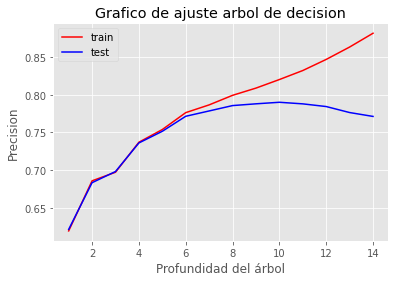

In [ ]:
train_prec =  []
eval_prec = []
max_deep_list = list(range(1, 15))

for deep in max_deep_list:
    arbol = DecisionTreeClassifier(criterion='entropy', max_depth=deep)
    arbol.fit(X_train, y_train)
    train_prec.append(arbol.score(X_train, y_train))
    eval_prec.append(arbol.score(X_test, y_test))

# Graficar los resultados.
plt.plot(max_deep_list, train_prec, color='r', label='train')
plt.plot(max_deep_list, eval_prec, color='b', label='test')
plt.title('Grafico de ajuste arbol de decision')
plt.legend()
plt.ylabel('Precision')
plt.xlabel('Profundidad del árbol')
plt.show()

Con este gráfico de ajuste, se visualiza la precisión del modelo en función de su complejidad. Aqui podemos ver que el punto con mayor precisión, en los datos de evaluación, lo obtenemos con un nivel de profundidad de aproximadamente 9 nodos; a partir de allí el modelo pierde en generalización y comienza a estar sobreajustado.

Ya tenemos el numero adecuado para utilizar en el nivel de profundidad de nuestro arbol, pero evaluemos que cuales son los valores optimos para utilizar en otros hiperparametros. 

In [ ]:
from sklearn.model_selection import GridSearchCV #Búsqueda exhaustiva sobre valores de parámetros específicos para un estimador.
from sklearn.pipeline import Pipeline # Para aplicar secuencialmente una lista de transformadas y un estimador final.
import warnings 
warnings.filterwarnings("ignore") #Ignoramos los warnings

modelo1_pipe = Pipeline([('modelo1', DecisionTreeClassifier())]) #Aplicamos Pipeline al modelo 1

params = [{'modelo1__criterion': ['gini', 'entropy', 'log_loss'], 'modelo1__splitter': ['best', 'random'], 'modelo1__max_features': ['auto', 'sqrt', 'log2','None']}]
#Seleccionamos mediante una lista los hiperparametros a evaluar 

gs_modelo1 = GridSearchCV (modelo1_pipe, param_grid= params, scoring = 'accuracy', cv=5)  

gs_modelo1.fit(X_train, y_train) 
gs_modelo1.best_params_

{'modelo1__criterion': 'entropy',
 'modelo1__max_features': 'sqrt',
 'modelo1__splitter': 'best'}

Acá ya tenemos la lista con los valores optimos para aplicar en nuestro modelo. 

Ahora pongamoslo a prueba. 

In [ ]:
modelo1 = DecisionTreeClassifier(random_state=7,criterion='entropy', splitter = 'best', max_depth=9)  
# Se aplica modelo clasificador Arbol de decisión con los hiperparametros adecuados
modelo1.fit(X_train, y_train)

y_train_pred_tree = modelo1.predict(X_train)
print('Training accuracy on all features: %.3f' % acc(y_train, y_train_pred_tree))

y_test_pred_tree = modelo1.predict(X_test)
print('Testing accuracy on all features: %.3f' % acc(y_test, y_test_pred_tree))

Training accuracy on all features: 0.809
Testing accuracy on all features: 0.788


Se evalúa la capacidad predictiva del árbol calculando el accuracy en el conjunto de test y entrenamiento


El modelo es capaz de predecir con exactitud un 78 % de las observaciones del conjunto de test.

In [ ]:
preds1 = modelo1.predict(X_test)

Se crea **matriz de confusión** para evaluar el rendimiento del modelo de clasificación.

In [ ]:
confusion1 = metrics.confusion_matrix(y_test, preds1)
confusion1

array([[124005,  27834,     23,      0,      0,      0],
       [ 30656, 275135,  14757,    188,     17,      0],
       [    54,  28415,  33623,   2723,    482,      0],
       [     6,   1191,   7986,   3958,   1167,      4],
       [     3,     36,    847,   1562,   1746,     65],
       [     0,      0,      5,     10,     65,     18]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

<Figure size 720x1080 with 0 Axes>

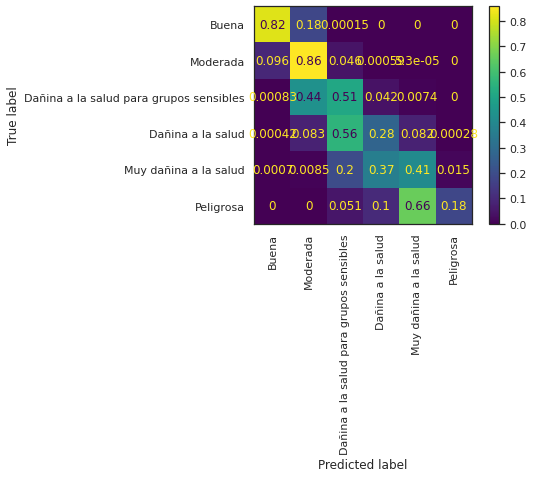

In [ ]:
import seaborn as sn
sns.set(style='white')
fig = plt.figure(figsize=(10,15))
metrics.plot_confusion_matrix(modelo1, X_test, y_test, normalize='true', values_format='.2g', display_labels=choicelist)
plt.xticks(rotation=90)

Aqui podemos ver que nuestro modelo tiene una precision muy buena en algunas clases (0 y 2), pero en algunas clases es baja, como es el caso de las clases 3, 4 y 5. 

In [ ]:
print(metrics.classification_report(y_test, preds1))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81    151862
           1       0.83      0.86      0.84    320753
           2       0.59      0.51      0.55     65297
           3       0.47      0.28      0.35     14312
           4       0.50      0.41      0.45      4259
           5       0.21      0.18      0.19        98

    accuracy                           0.79    556581
   macro avg       0.57      0.51      0.53    556581
weighted avg       0.78      0.79      0.78    556581



Por otro tenemos el recall, que tiene valores buenos para la clase 1 y 2, pero muy malos para la clase 3, 4, 5 y 6.



Por ultimo, el F1 score combinar las medidas de precision y recall en un sólo valor. Lo cual hace más fácil el poder comparar el rendimiento combinado de la precisión y la exhaustividad en cada clase a modo resumen. 

In [ ]:
import time
inicio = time.time()
modelo1.fit(X_train, y_train) 
fin = time.time()
intervalo = fin-inicio
print(f"El tiempo de entrenamiento de modelo {type(modelo1).__name__} es {intervalo:.2f} s")

El tiempo de entrenamiento de modelo DecisionTreeClassifier es 0.32 s


A modo de informacion calculamos cuanto tiempo demora el entrenamiento del modelo. 

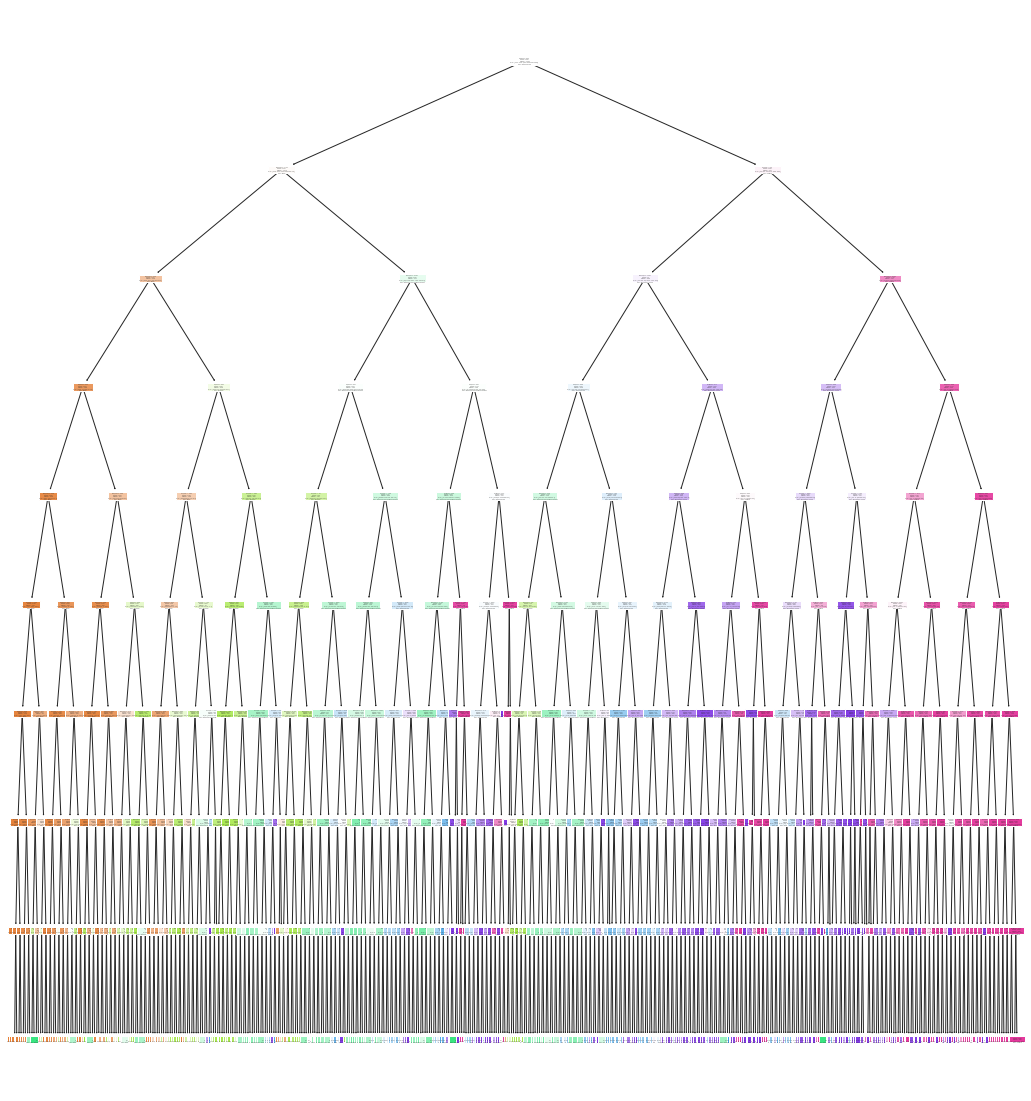

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(18,20))
tree.plot_tree(modelo1,feature_names=pollution[['O3 Mean','CO Mean','SO2 Mean','NO2 Mean']].columns.values,  
                   class_names=choicelist,
                   filled=True)
plt.savefig("modelo1.pdf")

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(modelo1,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                feature_names=pollution[['O3 Mean','CO Mean','SO2 Mean','NO2 Mean']].columns.values,
                                proportion=True,
                                class_names=choicelist) 

In [ ]:
graph = graphviz.Source(dot_data, format="pdf") 
graph.render("modelo1")

'modelo1.pdf'

Como conclusión podemos decir que, al aplicar este modelo, notamos que la métrica accuracy es engañosa cuando las clases están desbalanceadas. Ya que nos hace creer que el modelo es mejor de lo que en realidad es.

Apliquemos un algoritmo mas complejo 👇

#### **Modelo 2: RANDOM FOREST CLASSIFIER** 🌲🌳🌲🌳

Para mejorar nuestro problema de clasificacion, se utiliza una combinación de múltiples árboles (Random Forest), el cual es técnicas más complejas que un arbol simple.

In [ ]:
from sklearn.ensemble import RandomForestClassifier #Modelo que vamos a utilizar: Clasificador de bosque aleatorio 

In [ ]:
#Dividimos nuesteas variables en X e y 
X= pollution[['O3 Mean','CO Mean','SO2 Mean','NO2 Mean']] 
y= pollution.Target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.90, random_state=7) # Separamos en entrenamiento/test en razon 10/90 %

print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (61842, 4) (61842,)
Testing dataset shape: (556581, 4) (556581,)


In [ ]:
modelo2 = RandomForestClassifier(random_state=7, criterion= 'gini', max_depth=9, n_jobs=-1, max_features = 'sqrt') # Se utiliza como clasificador un bosque aleatorio
modelo2.fit(X_train, y_train)

y_train_pred_forest = modelo2.predict(X_train)
print('Training accuracy on all features: %.3f' % acc(y_train, y_train_pred_forest))

y_test_pred_forest = modelo2.predict(X_test)
print('Testing accuracy on all features: %.3f' % acc(y_test, y_test_pred_forest))

Training accuracy on all features: 0.822
Testing accuracy on all features: 0.801


Se evalúa la capacidad predictiva del árbol calculando el accuracy en el conjunto de test y entrenamiento


El modelo es capaz de predecir con exactitud un 80 % de las observaciones del conjunto de test.

Solo mejoró un 3% con respecto al anterior modelo, pero veamos la matriz de confusion...

In [ ]:
preds2 = modelo2.predict(X_test)
print(metrics.classification_report(y_test, preds2))

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.85      0.78      0.81    151862
           1       0.81      0.91      0.86    320753
           2       0.62      0.49      0.55     65297
           3       0.53      0.21      0.30     14312
           4       0.70      0.37      0.48      4259
           5       0.00      0.00      0.00        98

    accuracy                           0.80    556581
   macro avg       0.59      0.46      0.50    556581
weighted avg       0.79      0.80      0.79    556581



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Se crea **matriz de confusión** para evaluar el rendimiento del modelo de clasificación.

Aqui podemos ver que nuestro modelo tiene una precision buena en las clases 0 y 1, y algunas algunas muy bajas, como es el caso de las clases 5

Por otro tenemos el recall, que tiene valores excelentes 1, y una mejora en las otras clases respecto al modelo anterior. 

Por ultimo, el F1 score tambien ha mejorado levemente. 


In [ ]:
confusion2 = metrics.confusion_matrix(y_test, preds2)
confusion2

array([[118239,  33622,      1,      0,      0,      0],
       [ 20638, 291108,   8994,     12,      1,      0],
       [    22,  31972,  32069,   1162,     72,      0],
       [     3,   1131,   9624,   3040,    514,      0],
       [     3,     26,   1166,   1509,   1555,      0],
       [     0,      0,      5,      4,     89,      0]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

<Figure size 720x1080 with 0 Axes>

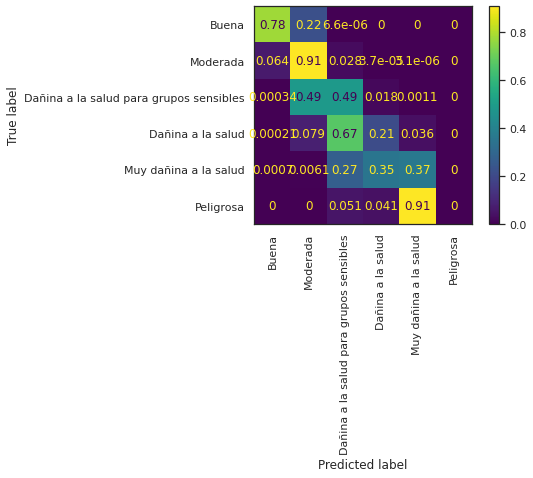

In [ ]:
import seaborn as sn
sns.set(style='white')
fig = plt.figure(figsize=(10,15))
metrics.plot_confusion_matrix(modelo2, X_test, y_test, normalize='true', display_labels=choicelist)
plt.xticks(rotation=90)

In [ ]:
import time
inicio = time.time()
modelo2.fit(X_train, y_train) 
fin = time.time()
intervalo = fin-inicio
print(f"El tiempo de entrenamiento de modelo {type(modelo2).__name__} es {intervalo:.2f} s")

El tiempo de entrenamiento de modelo RandomForestClassifier es 5.95 s


A modo de informacion calculamos cuanto tiempo demora el entrenamiento del modelo. 

Pero podriamos seguir mejorando aplicando el otro algoritmo con buenos resultados que obtuvimos en el *BEACHMARK DE MODELOS* 👇

#### **Modelo 3: XGBCLASSIFIER** 🧮

In [ ]:
import xgboost as xgb #Modelo que vamos a utilizar: Extreme gradient boosting - Refuerzo de gradientes extremo

In [ ]:
#Dividimos nuesteas variables en X e y 
X= pollution[['O3 Mean','CO Mean','SO2 Mean','NO2 Mean']] 
y= pollution.Target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.87, random_state=1234) # Separamos en entrenamiento/test en razon 13/87 %

print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (80394, 4) (80394,)
Testing dataset shape: (538029, 4) (538029,)


In [ ]:
#Construyo el modelo y ajusto los datos.
modelo3 = xgb.XGBClassifier(random_state=7, max_depth=9, n_jobs=-1)
modelo3.fit(X_train, y_train)

# Realizo y evaluo las predicciones 
y_train_pred_xgb = modelo3.predict(X_train)
print('Training accuracy on all features: %.3f' % acc(y_train, y_train_pred_xgb))

y_test_pred_xgb = modelo3.predict(X_test)
print('Testing accuracy on all features: %.3f' % acc(y_test, y_test_pred_xgb))


Training accuracy on all features: 0.866
Testing accuracy on all features: 0.808


Se evalúa la capacidad predictiva del modelo calculando el accuracy en el conjunto de test y entrenamiento.


El modelo es capaz de predecir con exactitud un 80 % de las observaciones del conjunto de test.

In [ ]:
preds3 = modelo3.predict(X_test)
print(metrics.classification_report(y_test, preds3))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83    146581
           1       0.84      0.88      0.86    310077
           2       0.62      0.55      0.58     63308
           3       0.49      0.34      0.41     13843
           4       0.60      0.47      0.53      4117
           5       0.42      0.16      0.23       103

    accuracy                           0.81    538029
   macro avg       0.63      0.54      0.57    538029
weighted avg       0.80      0.81      0.80    538029



Se crea **matriz de confusión** para evaluar el rendimiento del modelo de clasificación.

In [ ]:
confusion3 = metrics.confusion_matrix(y_test, preds3)
confusion3

array([[119347,  27231,      1,      2,      0,      0],
       [ 23281, 273688,  12967,    139,      2,      0],
       [    26,  25028,  34731,   3277,    246,      0],
       [     4,    767,   7323,   4763,    985,      1],
       [     3,     17,    645,   1486,   1945,     21],
       [     0,      0,      0,      9,     78,     16]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

<Figure size 720x1080 with 0 Axes>

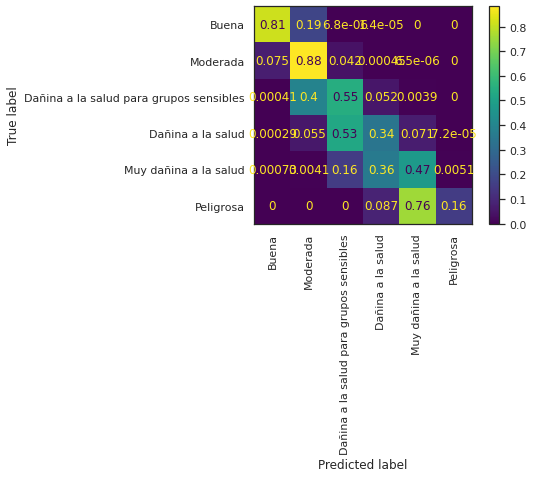

In [ ]:
import seaborn as sn
sns.set(style='white')
fig = plt.figure(figsize=(10,15))
metrics.plot_confusion_matrix(modelo3, X_test, y_test, normalize='true', display_labels=choicelist)
plt.xticks(rotation=90)

In [ ]:
import time
inicio = time.time()
modelo3.fit(X_train, y_train) 
fin = time.time()
intervalo = fin-inicio
print(f"El tiempo de entrenamiento de modelo {type(modelo3).__name__} es {intervalo:.2f} s")

El tiempo de entrenamiento de modelo XGBClassifier es 36.75 s


A modo de informacion calculamos cuanto tiempo demora el entrenamiento del modelo. 

Como conclusión podemos ver como fuimos mejorando modelo a modelo evaluandolo con las metricas. 

### **SEGUNDA RONDA**: ENTRENAMIENTO CON 4 VARIABLES + OVERSAMPLING

En esta segunda ronda realizaremos el entrenamiento de nuestros modelos utilizando las 4 variables obtenidas en nuestro feature selection pero aplicando oversampling.

* O3 Mean
* CO Mean
* SO2 Mean
* NO2 Mean

#### **Modelo 1: DECISION TREE CLASSIFIER** 🌳

Para comenzar con nuestro problema de clasificacion se inicio ejecutando un algoritmo de DecisionTreeClassifier con las variables finales obtenidas de nuestro Feature Selection.

In [ ]:
from sklearn.tree import DecisionTreeClassifier #Modelo que vamos a utilizar: Arbol de Desicion 
from sklearn.model_selection import train_test_split # Lo utilizamos para dividir los datos en subconjuntos aleatorios de entrenamiento y test.
from sklearn import metrics # Lo vamos a utilizar para valuar la calidad de las predicciones de un modelo:
from sklearn.metrics import accuracy_score as acc #Para medir la precisión del subconjunto
from imblearn.over_sampling import SMOTE


In [ ]:
#Dividimos nuesteas variables en X e y 
X= pollution[['O3 Mean','CO Mean','SO2 Mean','NO2 Mean']] 
y= pollution.Target

sm = SMOTE(random_state=7) #Aplicamos SMOTE para equilibrar nuestros datos
X, y = sm.fit_resample(X, y) 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.90, random_state=7) # Separamos en entrenamiento/test en razon 10/90 %

print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (213742, 4) (213742,)
Testing dataset shape: (1923680, 4) (1923680,)


Al tener una base de datos con varios registros se separa el dataset en:

* 10% Entrenamiento
* 90% Test

Al tener varios registros en nuestro dataset, nos permiten hacer esta separación y dejar la mayoria de los datos para realizar test de nuestros modelos. 

In [ ]:
modelo1 = DecisionTreeClassifier(random_state=7,criterion='entropy')  # Se utiliza como modelo clasificador un Arbol de decisión
modelo1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=7)

In [ ]:
# precisión del modelo en datos de entrenamiento.
print("Precisión entranamiento: {0: .2f}".format(
        modelo1.score(X_train, y_train)))

Precisión entranamiento:  1.00


Logramos una precisión del 100 %. Veamos como se comporta con los datos de evaluación

In [ ]:
# precisión del modelo en datos de evaluación.
print("Precisión evaluación: {0: .2f}".format(
        modelo1.score(X_test, y_test)))

Precisión evaluación:  0.79


Ahora nuestro modelo ya no se muestra tan preciso. Lo cual nos esta diciendo que nuestro modelo está sobreajustado, ya que dejamos crecer el árbol hasta que cada hoja estuviera pura (es decir que solo contenga datos de una sola de las clases a predecir). Una alternativa para reducir el sobreajuste y ver si podemos lograr que generalice mejor y por tanto tenga más precisión para datos nunca vistos, es tratar de reducir la complejidad del modelo por medio de controlar la profundidad que puede alcanzar el Árbol de Decisión.

In [ ]:
# Profundidad del arbol de decisión.
modelo1.tree_.max_depth

42

Con el objetivo de identificar la profundidad óptima que consigue reducir la varianza y aumentar la capacidad predictiva del modelo, se somete al árbol a un proceso de pruning.

Este caso nuestro modelo tiene una profundidad de 42 nodos; veamos si reduciendo esa cantidad podemos mejorar la precisión en los datos de evaluación. Por ejemplo, pongamos un máximo de profundidad de 20 nodos.

In [ ]:
modelo1 = DecisionTreeClassifier(random_state=7,criterion='entropy', max_depth=20) # Modelo clasificador Arbol de decisión con control de profundiad de 20 nodos
modelo1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=7)

In [ ]:
print("Precisión evaluación: {0: .2f}".format(
        modelo1.score(X_train, y_train)))

Precisión evaluación:  0.96


In [ ]:
print("Precisión evaluación: {0: .2f}".format(
        modelo1.score(X_test, y_test)))

Precisión evaluación:  0.79


Ahora podemos ver que ya no tenemos un modelo con 100% de precisión en los datos de entrenamiento, sino que la precisión es inferior: **96%**

Esta diferencia se debe a que reducimos la complejidad del modelo para intentar ganar en generalización. También se tiene en cuenta que si seguimos reduciendo la complejidad, podemos crear un modelo demasiado simple que en vez de estar sobreajustado puede tener un desempeño muy por debajo del que podría tener; podríamos decir que el modelo estaría infraajustado y tendría un alto nivel de sesgo. 

Pero entonces...¿Como se que profundidad tiene que tener el modelo? 😧 

Para encontrar el término medio entre la complejidad del modelo y su ajuste a los datos, nos ayudamos de herramientas gráficas. Primero creando diferentes modelos, con distintos grados de complejidad y luego graficar la precisión en función de la complejidad.

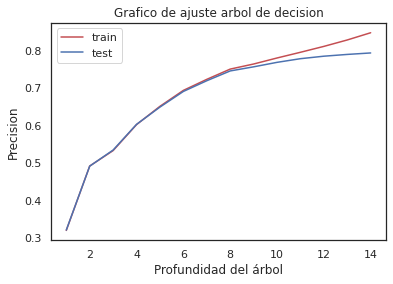

In [ ]:
train_prec =  []
eval_prec = []
max_deep_list = list(range(1, 15))

for deep in max_deep_list:
    arbol = DecisionTreeClassifier(criterion='entropy', max_depth=deep)
    arbol.fit(X_train, y_train)
    train_prec.append(arbol.score(X_train, y_train))
    eval_prec.append(arbol.score(X_test, y_test))

# Graficar los resultados.
plt.plot(max_deep_list, train_prec, color='r', label='train')
plt.plot(max_deep_list, eval_prec, color='b', label='test')
plt.title('Grafico de ajuste arbol de decision')
plt.legend()
plt.ylabel('Precision')
plt.xlabel('Profundidad del árbol')
plt.show()

Con este gráfico de ajuste, se visualiza la precisión del modelo en función de su complejidad. Aqui podemos ver que el punto con mayor precisión, en los datos de evaluación, lo obtenemos con un nivel de profundidad de aproximadamente 9 nodos; a partir de allí el modelo pierde en generalización y comienza a estar sobreajustado.

Ya tenemos el numero adecuado para utilizar en el nivel de profundidad de nuestro arbol, pero evaluemos que cuales son los valores optimos para utilizar en otros hiperparametros. 

In [ ]:
from sklearn.model_selection import GridSearchCV #Búsqueda exhaustiva sobre valores de parámetros específicos para un estimador.
from sklearn.pipeline import Pipeline # Para aplicar secuencialmente una lista de transformadas y un estimador final.
import warnings 
warnings.filterwarnings("ignore") #Ignoramos los warnings

modelo1_pipe = Pipeline([('modelo1', DecisionTreeClassifier())]) #Aplicamos Pipeline al modelo 1

params = [{'modelo1__criterion': ['gini', 'entropy', 'log_loss'], 'modelo1__splitter': ['best', 'random'], 'modelo1__max_features': ['auto', 'sqrt', 'log2','None']}]
#Seleccionamos mediante una lista los hiperparametros a evaluar 

gs_modelo1 = GridSearchCV (modelo1_pipe, param_grid= params, scoring = 'accuracy', cv=5)  

gs_modelo1.fit(X_train, y_train) 
gs_modelo1.best_params_

{'modelo1__criterion': 'entropy',
 'modelo1__max_features': 'sqrt',
 'modelo1__splitter': 'best'}

Acá ya tenemos la lista con los valores optimos para aplicar en nuestro modelo. 

Ahora pongamoslo a prueba. 

In [ ]:
modelo1 = DecisionTreeClassifier(random_state=7,criterion='entropy', splitter = 'best', max_depth=9)  
# Se aplica modelo clasificador Arbol de decisión con los hiperparametros adecuados
modelo1.fit(X_train, y_train)

y_train_pred_tree = modelo1.predict(X_train)
print('Training accuracy on all features: %.3f' % acc(y_train, y_train_pred_tree))

y_test_pred_tree = modelo1.predict(X_test)
print('Testing accuracy on all features: %.3f' % acc(y_test, y_test_pred_tree))

Training accuracy on all features: 0.764
Testing accuracy on all features: 0.757


Se evalúa la capacidad predictiva del árbol calculando el accuracy en el conjunto de test y entrenamiento


El modelo es capaz de predecir con exactitud un 75 % de las observaciones del conjunto de test.

In [ ]:
preds1 = modelo1.predict(X_test)

Se crea **matriz de confusión** para evaluar el rendimiento del modelo de clasificación.

In [ ]:
confusion1 = metrics.confusion_matrix(y_test, preds1)
confusion1

array([[291901,  28570,     71,      0,      0,      0],
       [ 52798, 209424,  55560,   2865,     33,      0],
       [   210,  38631, 206831,  71617,   3338,     16],
       [    40,   1506,  55108, 211155,  51907,    718],
       [    65,    283,   2996,  71522, 221967,  23643],
       [     0,      0,      0,     46,   6354, 314505]])

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

<Figure size 720x1080 with 0 Axes>

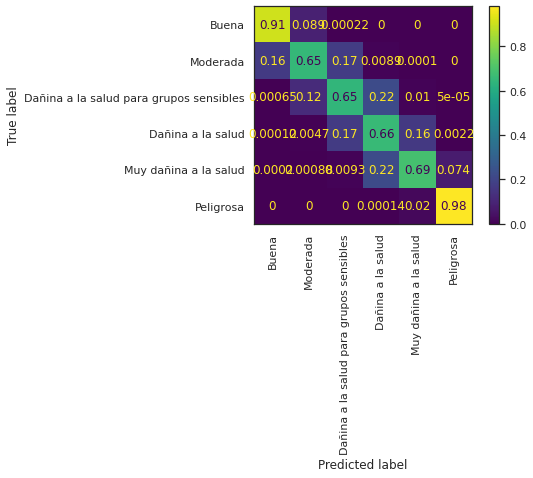

In [ ]:
import seaborn as sn
sns.set(style='white')
fig = plt.figure(figsize=(10,15))
metrics.plot_confusion_matrix(modelo1, X_test, y_test, normalize='true', values_format='.2g', display_labels=choicelist)
plt.xticks(rotation=90)

Aqui podemos ver que nuestro modelo tiene una precision muy buena en algunas clases (0 y 5), pero en algunas clases es baja, como es el caso de las clases 2 y 3. 

In [ ]:
print(metrics.classification_report(y_test, preds1))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88    320542
           1       0.75      0.65      0.70    320680
           2       0.65      0.65      0.65    320643
           3       0.59      0.66      0.62    320434
           4       0.78      0.69      0.73    320476
           5       0.93      0.98      0.95    320905

    accuracy                           0.76   1923680
   macro avg       0.76      0.76      0.76   1923680
weighted avg       0.76      0.76      0.76   1923680



Por otro tenemos el recall, que tiene valores excelentes para la clase 0 y 5, pero malo / regular  para la clase 1, 2 , 3 y 4, es decir que el modelo sólo es capaz de identificar un 65% / 70%  dichas clases, contra 91% / 98% que logra indentificar en la clase 0 y 5.



Por ultimo, el F1 score combinar las medidas de precision y recall en un sólo valor. Lo cual hace más fácil el poder comparar el rendimiento combinado de la precisión y la exhaustividad en cada clase a modo resumen. 

In [ ]:
import time
inicio = time.time()
modelo1.fit(X_train, y_train) 
fin = time.time()
intervalo = fin-inicio
print(f"El tiempo de entrenamiento de modelo {type(modelo1).__name__} es {intervalo:.2f} s")

El tiempo de entrenamiento de modelo DecisionTreeClassifier es 2.76 s


A modo de informacion calculamos cuanto tiempo demora el entrenamiento del modelo. 

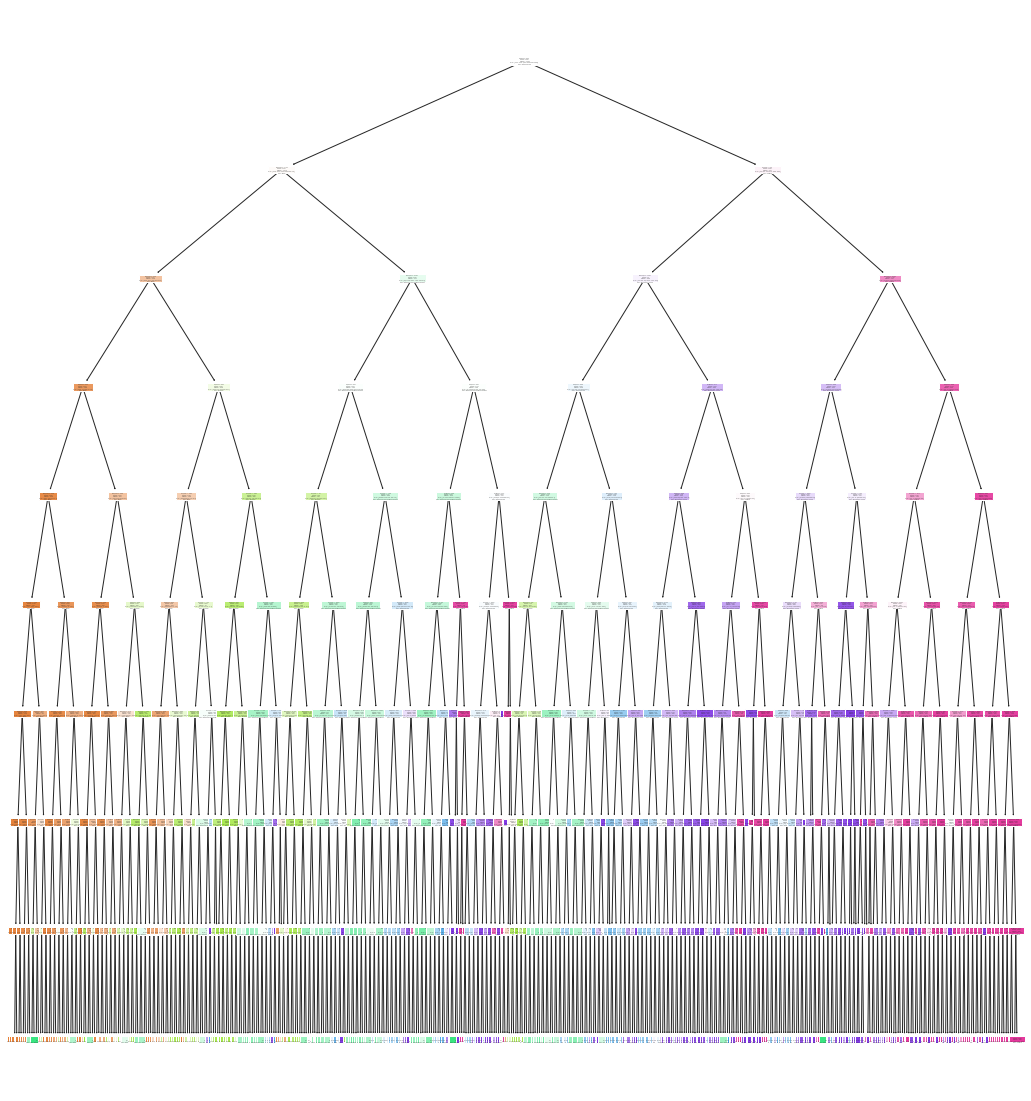

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(18,20))
tree.plot_tree(modelo1,feature_names=pollution[['O3 Mean','CO Mean','SO2 Mean','NO2 Mean']].columns.values,  
                   class_names=choicelist,
                   filled=True)
plt.savefig("modelo1.pdf")

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(modelo1,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                feature_names=pollution[['O3 Mean','CO Mean','SO2 Mean','NO2 Mean']].columns.values,
                                proportion=True,
                                class_names=choicelist) 

In [ ]:
graph = graphviz.Source(dot_data, format="pdf") 
graph.render("modelo1")

'modelo1.pdf'

Como conclusión podemos decir que, al aplicar este modelo, notamos que la métrica accuracy es engañosa cuando las clases están desbalanceadas. Ya que nos hace creer que el modelo es mejor de lo que en realidad es.

Apliquemos un algoritmo mas complejo 👇

#### **Modelo 2: RANDOM FOREST CLASSIFIER** 🌲🌳🌲🌳

Para mejorar nuestro problema de clasificacion, se utiliza una combinación de múltiples árboles (Random Forest), el cual es técnicas más complejas que un arbol simple.

In [ ]:
from sklearn.ensemble import RandomForestClassifier #Modelo que vamos a utilizar: Clasificador de bosque aleatorio 

In [ ]:
#Dividimos nuesteas variables en X e y 
X= pollution[['O3 Mean','CO Mean','SO2 Mean','NO2 Mean']] 
y= pollution.Target

sm = SMOTE(random_state=7) #Aplicamos SMOTE para equilibrar nuestros datos
X, y = sm.fit_resample(X, y) 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.90, random_state=7) # Separamos en entrenamiento/test en razon 10/90 %

print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (213742, 4) (213742,)
Testing dataset shape: (1923680, 4) (1923680,)


In [ ]:
modelo2 = RandomForestClassifier(random_state=7, criterion= 'gini', max_depth=9, n_jobs=-1, max_features = 'sqrt') # Se utiliza como clasificador un bosque aleatorio
modelo2.fit(X_train, y_train)

y_train_pred_forest = modelo2.predict(X_train)
print('Training accuracy on all features: %.3f' % acc(y_train, y_train_pred_forest))

y_test_pred_forest = modelo2.predict(X_test)
print('Testing accuracy on all features: %.3f' % acc(y_test, y_test_pred_forest))

Training accuracy on all features: 0.792
Testing accuracy on all features: 0.784


Se evalúa la capacidad predictiva del árbol calculando el accuracy en el conjunto de test y entrenamiento


El modelo es capaz de predecir con exactitud un 78 % de las observaciones del conjunto de test.

Solo mejoró un 3% con respecto al anterior modelo, pero veamos la matriz de confusion...

In [ ]:
preds2 = modelo2.predict(X_test)
print(metrics.classification_report(y_test, preds2))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89    320542
           1       0.78      0.70      0.74    320680
           2       0.67      0.72      0.69    320643
           3       0.64      0.65      0.64    320434
           4       0.80      0.76      0.78    320476
           5       0.94      0.99      0.96    320905

    accuracy                           0.78   1923680
   macro avg       0.78      0.78      0.78   1923680
weighted avg       0.78      0.78      0.78   1923680



Se crea **matriz de confusión** para evaluar el rendimiento del modelo de clasificación.

Aqui podemos ver que nuestro modelo tiene una precision muy buena en la mayoria de las clases (0, 1, 4 y 5), y algunas algunas clases es baja / regular, como es el caso de las clases 2 y 3. 

Por otro tenemos el recall, que tiene valores excelentes para la clase 0 y 5, y una mejora en las otras clases respecto al modelo anterior. 

Por ultimo, el F1 score tambien ha mejorado levemente. 


In [ ]:
confusion2 = metrics.confusion_matrix(y_test, preds2)
confusion2

array([[286992,  33510,     39,      1,      0,      0],
       [ 39937, 224248,  54485,   1998,     12,      0],
       [   131,  29385, 230481,  57897,   2746,      3],
       [    23,    984,  57626, 207177,  54349,    275],
       [    67,    212,   3000,  55291, 243144,  18762],
       [     0,      0,      0,      0,   4538, 316367]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

<Figure size 720x1080 with 0 Axes>

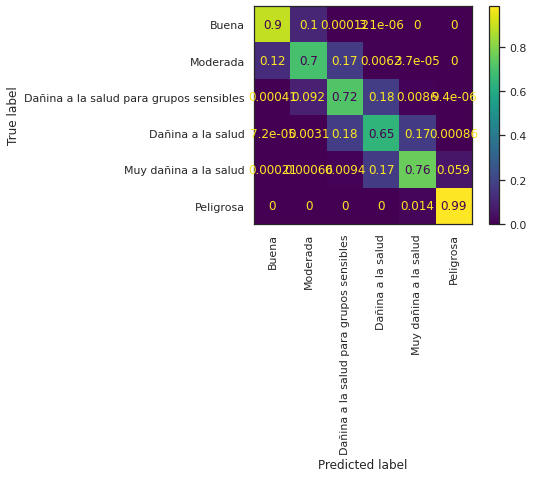

In [ ]:
import seaborn as sn
sns.set(style='white')
fig = plt.figure(figsize=(10,15))
metrics.plot_confusion_matrix(modelo2, X_test, y_test, normalize='true', display_labels=choicelist)
plt.xticks(rotation=90)

In [ ]:
import time
inicio = time.time()
modelo2.fit(X_train, y_train) 
fin = time.time()
intervalo = fin-inicio
print(f"El tiempo de entrenamiento de modelo {type(modelo2).__name__} es {intervalo:.2f} s")

El tiempo de entrenamiento de modelo RandomForestClassifier es 28.42 s


A modo de informacion calculamos cuanto tiempo demora el entrenamiento del modelo. 

Pero podriamos seguir mejorando aplicando el otro algoritmo con buenos resultados que obtuvimos en el *BEACHMARK DE MODELOS* 👇

#### **Modelo 3: XGBCLASSIFIER** 🧮

In [ ]:
import xgboost as xgb #Modelo que vamos a utilizar: Extreme gradient boosting - Refuerzo de gradientes extremo

In [ ]:
#Dividimos nuesteas variables en X e y 
X= pollution[['O3 Mean','CO Mean','SO2 Mean','NO2 Mean']] 
y= pollution.Target

sm = SMOTE(random_state=7) #Aplicamos SMOTE para equilibrar nuestros datos
X, y = sm.fit_resample(X, y) 


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.87, random_state=1234) # Separamos en entrenamiento/test en razon 13/87 %

print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (277864, 4) (277864,)
Testing dataset shape: (1859558, 4) (1859558,)


In [ ]:
#Construyo el modelo y ajusto los datos.
modelo3 = xgb.XGBClassifier(random_state=7, max_depth=9, n_jobs=-1)
modelo3.fit(X_train, y_train)

# Realizo y evaluo las predicciones 
y_train_pred_xgb = modelo3.predict(X_train)
print('Training accuracy on all features: %.3f' % acc(y_train, y_train_pred_xgb))

y_test_pred_xgb = modelo3.predict(X_test)
print('Testing accuracy on all features: %.3f' % acc(y_test, y_test_pred_xgb))


Training accuracy on all features: 0.844
Testing accuracy on all features: 0.818


Se evalúa la capacidad predictiva del modelo calculando el accuracy en el conjunto de test y entrenamiento.


El modelo es capaz de predecir con exactitud un 82 % de las observaciones del conjunto de test.

Mejoró un 6% con respecto al modelo inicial, pero veamos la matriz de confusion...

In [ ]:
preds3 = modelo3.predict(X_test)
print(metrics.classification_report(y_test, preds3))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90    309754
           1       0.79      0.74      0.76    310159
           2       0.71      0.71      0.71    310115
           3       0.70      0.70      0.70    309568
           4       0.84      0.85      0.84    309814
           5       0.97      1.00      0.99    310148

    accuracy                           0.82   1859558
   macro avg       0.82      0.82      0.82   1859558
weighted avg       0.82      0.82      0.82   1859558



Se crea **matriz de confusión** para evaluar el rendimiento del modelo de clasificación.

Aqui podemos ver que nuestro modelo tiene una precision muy buena en gran mayoria de las clases (0, 1, 4 y 5), y algunas algunas clases regular / buena, como es el caso de las clases 2 y 3. 

Por otro tenemos el recall, que tiene valores excelentes para la clase 0, 4 y 5, y una mejora en las otras clases respecto al modelo anterior. 

Por ultimo, el F1 score tambien ha mejorado notoramiento respecto al modelo inicial. 


In [ ]:
confusion3 = metrics.confusion_matrix(y_test, preds3)
confusion3

array([[282974,  26765,     12,      3,      0,      0],
       [ 38178, 228244,  41921,   1787,     29,      0],
       [    88,  31294, 220713,  55144,   2876,      0],
       [    30,    990,  45021, 218160,  45222,    145],
       [    49,    207,   1773,  37713, 262214,   7858],
       [     0,      0,      0,      0,    665, 309483]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

<Figure size 720x1080 with 0 Axes>

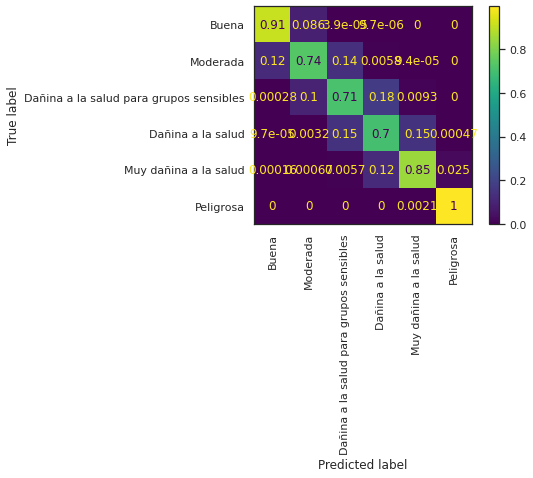

In [ ]:
import seaborn as sn
sns.set(style='white')
fig = plt.figure(figsize=(10,15))
metrics.plot_confusion_matrix(modelo3, X_test, y_test, normalize='true', display_labels=choicelist)
plt.xticks(rotation=90)

In [ ]:
import time
inicio = time.time()
modelo3.fit(X_train, y_train) 
fin = time.time()
intervalo = fin-inicio
print(f"El tiempo de entrenamiento de modelo {type(modelo3).__name__} es {intervalo:.2f} s")

El tiempo de entrenamiento de modelo XGBClassifier es 191.12 s


A modo de informacion calculamos cuanto tiempo demora el entrenamiento del modelo. 

Como conclusión podemos ver como fuimos mejorando modelo a modelo evaluandolo con las metricas. 

### **TERCER RONDA**: ENTRENAMIENTO CON 8 VARIABLES

En esta tercer ronda de entrenamiento, aplicaremos los mismos algoritmos de clasificación pero agragando las siguientes variables a nuestros modelos:

* O3 1st Max Value
* CO 1st Max Value
* SO2 1st Max Value
* NO2 1st Max Value

Los cuales corresponden a los valores maximos registrados de cada contaminante.


#### **Modelo 1: DECISION TREE CLASSIFIER** 🌳

In [ ]:
from sklearn.tree import DecisionTreeClassifier #Modelo que vamos a utilizar: Arbol de Desicion 
from sklearn.model_selection import train_test_split # Lo utilizamos para dividir los datos en subconjuntos aleatorios de entrenamiento y test.
from sklearn import metrics # Lo vamos a utilizar para valuar la calidad de las predicciones de un modelo:
from sklearn.metrics import accuracy_score as acc #Para medir la precisión del subconjunto
from imblearn.over_sampling import SMOTE


In [ ]:
#Dividimos nuesteas variables en X e y 
X= pollution[['O3 Mean','CO Mean','SO2 Mean','NO2 Mean', 'O3 1st Max Value', 'CO 1st Max Value', 'SO2 1st Max Value', 'NO2 1st Max Value']] 
y= pollution.Target

sm = SMOTE(random_state=7) #Aplicamos SMOTE para equilibrar nuestros datos
X, y = sm.fit_resample(X, y) 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.90, random_state=7) # Separamos en entrenamiento/test en razon 10/90 %

print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (213742, 8) (213742,)
Testing dataset shape: (1923680, 8) (1923680,)


In [ ]:
modelo1 = DecisionTreeClassifier(random_state=7,criterion='entropy', max_depth=9)  # Se aplica modelo clasificador Arbol de decisión con 9 nodos
modelo1.fit(X_train, y_train)

y_train_pred_tree = modelo1.predict(X_train)
print('Training accuracy on all features: %.3f' % acc(y_train, y_train_pred_tree))

y_test_pred_tree = modelo1.predict(X_test)
print('Testing accuracy on all features: %.3f' % acc(y_test, y_test_pred_tree))

Training accuracy on all features: 0.944
Testing accuracy on all features: 0.939


Se evalúa la capacidad predictiva del árbol calculando el accuracy en el conjunto de test y entrenamiento


El modelo es capaz de predecir con exactitud un 93 % de las observaciones del conjunto de test.

In [ ]:
preds1 = modelo1.predict(X_test)

Se crea **matriz de confusión** para evaluar el rendimiento del modelo de clasificación.

In [ ]:
confusion1 = metrics.confusion_matrix(y_test, preds1)
confusion1

array([[308986,  11552,      4,      0,      0,      0],
       [ 16210, 284049,  20419,      2,      0,      0],
       [     7,  13977, 288140,  18515,      4,      0],
       [     8,    581,  11830, 294367,  13648,      0],
       [    53,    336,    531,   7656, 309850,   2050],
       [     0,      0,      0,     19,    126, 320760]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

<Figure size 720x1080 with 0 Axes>

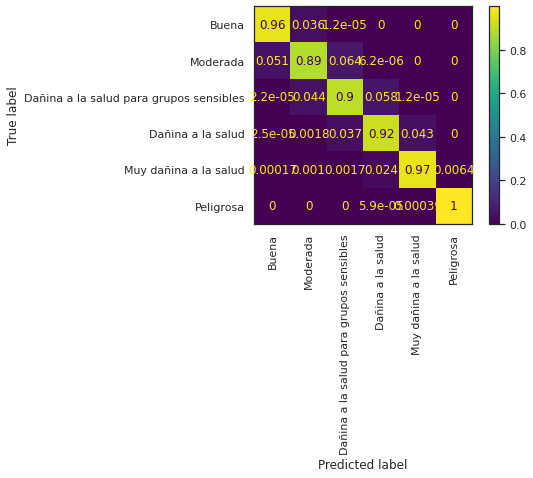

In [ ]:
import seaborn as sn
sns.set(style='white')
fig = plt.figure(figsize=(10,15))
metrics.plot_confusion_matrix(modelo1, X_test, y_test, normalize='true', values_format='.2g', display_labels=choicelist)
plt.xticks(rotation=90)

Aqui podemos ver que nuestro modelo tiene una precision excelente para casi todas las clases, ya que la clase *Moderada* es mas baja en relación a las otras.  

In [ ]:
print(metrics.classification_report(y_test, preds1))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96    320542
           1       0.91      0.89      0.90    320680
           2       0.90      0.90      0.90    320643
           3       0.92      0.92      0.92    320434
           4       0.96      0.97      0.96    320476
           5       0.99      1.00      1.00    320905

    accuracy                           0.94   1923680
   macro avg       0.94      0.94      0.94   1923680
weighted avg       0.94      0.94      0.94   1923680



In [ ]:
import time
inicio = time.time()
modelo1.fit(X_train, y_train) 
fin = time.time()
intervalo = fin-inicio
print(f"El tiempo de entrenamiento de modelo {type(modelo1).__name__} es {intervalo:.2f} s")

El tiempo de entrenamiento de modelo DecisionTreeClassifier es 4.01 s


A modo de informacion calculamos cuanto tiempo demora el entrenamiento del modelo. 

#### **Modelo 2: RANDOM FOREST CLASSIFIER** 🌲🌳🌲🌳

Para mejorar nuestro problema de clasificacion, se utiliza una combinación de múltiples árboles (Random Forest), el cual es técnicas más complejas que un arbol simple.

In [ ]:
from sklearn.ensemble import RandomForestClassifier #Modelo que vamos a utilizar: Clasificador de bosque aleatorio 

In [ ]:
#Dividimos nuesteas variables en X e y 
X= pollution[['O3 Mean','CO Mean','SO2 Mean','NO2 Mean', 'O3 1st Max Value', 'CO 1st Max Value', 'SO2 1st Max Value', 'NO2 1st Max Value']] 
y= pollution.Target

sm = SMOTE(random_state=7) #Aplicamos SMOTE para equilibrar nuestros datos
X, y = sm.fit_resample(X, y) 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.90, random_state=7) # Separamos en entrenamiento/test en razon 10/90 %

print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (213742, 8) (213742,)
Testing dataset shape: (1923680, 8) (1923680,)


In [ ]:
modelo2 = RandomForestClassifier(random_state=7, criterion= 'gini', max_depth=9, n_jobs=-1, max_features = 'sqrt') # Se utiliza como clasificador un bosque aleatorio
modelo2.fit(X_train, y_train)

y_train_pred_forest = modelo2.predict(X_train)
print('Training accuracy on all features: %.3f' % acc(y_train, y_train_pred_forest))

y_test_pred_forest = modelo2.predict(X_test)
print('Testing accuracy on all features: %.3f' % acc(y_test, y_test_pred_forest))

Training accuracy on all features: 0.954
Testing accuracy on all features: 0.950


Se evalúa la capacidad predictiva del árbol calculando el accuracy en el conjunto de test y entrenamiento


El modelo es capaz de predecir con exactitud un 95 % de las observaciones del conjunto de test.


In [ ]:
preds2 = modelo2.predict(X_test)
print(metrics.classification_report(y_test, preds2))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    320542
           1       0.96      0.89      0.93    320680
           2       0.90      0.94      0.92    320643
           3       0.91      0.95      0.93    320434
           4       0.97      0.95      0.96    320476
           5       0.99      1.00      0.99    320905

    accuracy                           0.95   1923680
   macro avg       0.95      0.95      0.95   1923680
weighted avg       0.95      0.95      0.95   1923680



Se crea **matriz de confusión** para evaluar el rendimiento del modelo de clasificación.

In [ ]:
confusion2 = metrics.confusion_matrix(y_test, preds2)
confusion2

array([[311135,   9406,      0,      1,      0,      0],
       [  8889, 286804,  24987,      0,      0,      0],
       [    10,   2260, 300596,  17777,      0,      0],
       [     5,    511,   8420, 303338,   8160,      0],
       [    32,    308,    523,  10584, 305592,   3437],
       [     0,      0,      0,      0,      0, 320905]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

<Figure size 720x1080 with 0 Axes>

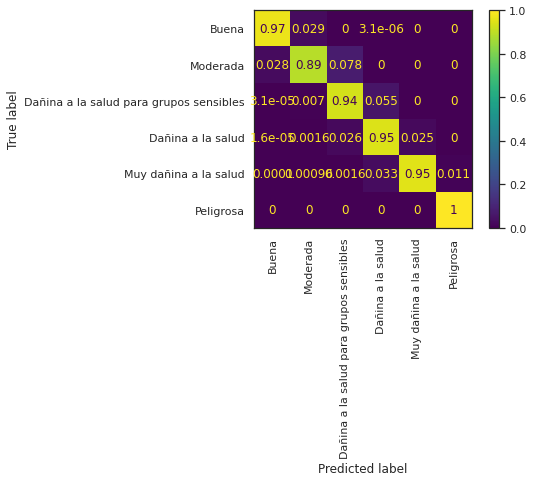

In [ ]:
import seaborn as sn
sns.set(style='white')
fig = plt.figure(figsize=(10,15))
metrics.plot_confusion_matrix(modelo2, X_test, y_test, normalize='true', display_labels=choicelist)
plt.xticks(rotation=90)

In [ ]:
import time
inicio = time.time()
modelo2.fit(X_train, y_train) 
fin = time.time()
intervalo = fin-inicio
print(f"El tiempo de entrenamiento de modelo {type(modelo2).__name__} es {intervalo:.2f} s")

El tiempo de entrenamiento de modelo RandomForestClassifier es 35.51 s


A modo de informacion calculamos cuanto tiempo demora el entrenamiento del modelo. 

#### **Modelo 3: XGBCLASSIFIER** 🧮

In [ ]:
import xgboost as xgb #Modelo que vamos a utilizar: Extreme gradient boosting - Refuerzo de gradientes extremo

In [ ]:
#Dividimos nuesteas variables en X e y 
X= pollution[['O3 Mean','CO Mean','SO2 Mean','NO2 Mean', 'O3 1st Max Value', 'CO 1st Max Value', 'SO2 1st Max Value', 'NO2 1st Max Value']] 
y= pollution.Target

sm = SMOTE(random_state=7) #Aplicamos SMOTE para equilibrar nuestros datos
X, y = sm.fit_resample(X, y) 


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.87, random_state=1234) # Separamos en entrenamiento/test en razon 13/87 %

print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (277864, 8) (277864,)
Testing dataset shape: (1859558, 8) (1859558,)


In [ ]:
#Construyo el modelo y ajusto los datos.
modelo3 = xgb.XGBClassifier(random_state=7, max_depth=9, n_jobs=-1)
modelo3.fit(X_train, y_train)

# Realizo y evaluo las predicciones 
y_train_pred_xgb = modelo3.predict(X_train)
print('Training accuracy on all features: %.3f' % acc(y_train, y_train_pred_xgb))

y_test_pred_xgb = modelo3.predict(X_test)
print('Testing accuracy on all features: %.3f' % acc(y_test, y_test_pred_xgb))


Training accuracy on all features: 0.999
Testing accuracy on all features: 0.993


Se evalúa la capacidad predictiva del modelo calculando el accuracy en el conjunto de test y entrenamiento.


El modelo es capaz de predecir con exactitud un 99 % de las observaciones del conjunto de test.


In [ ]:
preds3 = modelo3.predict(X_test)
print(metrics.classification_report(y_test, preds3))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    309754
           1       0.99      0.98      0.99    310159
           2       0.98      0.99      0.99    310115
           3       0.99      0.99      0.99    309568
           4       1.00      1.00      1.00    309814
           5       1.00      1.00      1.00    310148

    accuracy                           0.99   1859558
   macro avg       0.99      0.99      0.99   1859558
weighted avg       0.99      0.99      0.99   1859558



Se crea **matriz de confusión** para evaluar el rendimiento del modelo de clasificación.

In [ ]:
confusion3 = metrics.confusion_matrix(y_test, preds3)
confusion3

array([[308490,   1263,      0,      1,      0,      0],
       [  1919, 304827,   3411,      0,      2,      0],
       [     4,    776, 306687,   2644,      4,      0],
       [     4,    507,   1043, 307193,    821,      0],
       [    24,    252,    372,    691, 308371,    104],
       [     0,      0,      0,      0,     18, 310130]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

<Figure size 720x1080 with 0 Axes>

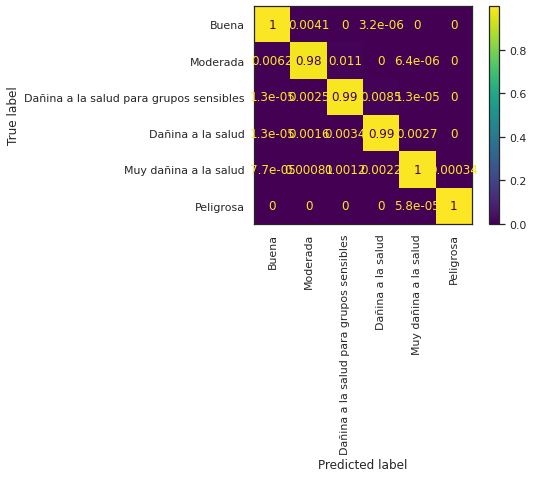

In [ ]:
import seaborn as sn
sns.set(style='white')
fig = plt.figure(figsize=(10,15))
metrics.plot_confusion_matrix(modelo3, X_test, y_test, normalize='true', display_labels=choicelist)
plt.xticks(rotation=90)

In [ ]:
import time
inicio = time.time()
modelo3.fit(X_train, y_train) 
fin = time.time()
intervalo = fin-inicio
print(f"El tiempo de entrenamiento de modelo {type(modelo3).__name__} es {intervalo:.2f} s")

El tiempo de entrenamiento de modelo XGBClassifier es 290.84 s


A modo de informacion calculamos cuanto tiempo demora el entrenamiento del modelo. 

**COMO CONCLUSION PARA ESTA TERCER RONDA DE ENTRENAMIENTO CON MAS VARIABLES PODEMOS DECIR QUE MEJORÓ NOTORIAMENTE EL RENDIMIENTO DE NUESTROS MODELOS.**

**AUMENTÓ LOS VALORES EN TODAS LAS METRICAS EVALUADAS SOLO SUMANDO UNA VARIABLE MAS DE CADA CONTAMINANTE!!!** 😃

### **CUARTA RONDA**: ENTRENAMIENTO CON 8 VARIABLES + SCALER + PCA




En esta cuarta ronda de entrenamiento de nuestro modelos, vamos a estandarizar las escalas para las 8 variables utilizadas en la segunda ronda y realizaremos el análisis de componentes principales (**Principal Component Analysis - PCA**), el cual es un método de reducción de dimensionalidad que permite simplificar la complejidad de espacios con múltiples dimensiones a la vez que conserva su información.


In [ ]:
#Dividimos nuesteas variables en X e y 
X= pollution[['O3 Mean','CO Mean','SO2 Mean','NO2 Mean', 'O3 1st Max Value', 'CO 1st Max Value', 'SO2 1st Max Value', 'NO2 1st Max Value']] 
y= pollution.Target

sm = SMOTE(random_state=7) #Aplicamos SMOTE para equilibrar nuestros datos
X, y = sm.fit_resample(X, y) 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.90, random_state=7) # Separamos en entrenamiento/test en razon 10/90 %

print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (213742, 8) (213742,)
Testing dataset shape: (1923680, 8) (1923680,)


En esta tercer ronda de entrenamiento nuestro siguiente paso será estandarizar las escalas para las 8 variables analizadas.

In [ ]:
from sklearn.preprocessing import StandardScaler #Se estandariza las escalas de las variables
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Una vez con los datos normalizados, aplicamos el PCA para analizar la variabilidad de nuestros datos



In [ ]:
from sklearn.decomposition import PCA #Se aplica PCA para reducción de la dimensionalidad
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.44871894 0.27295177 0.15683784 0.08063082 0.02271073 0.00943816
 0.005744   0.00296773]


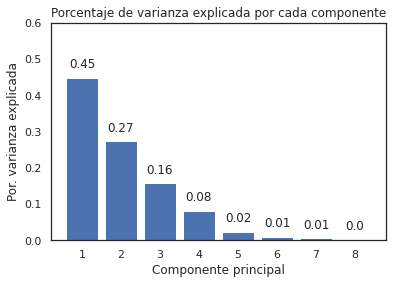

In [ ]:
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
# Explicación de la varianza de las componentes
print(pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(x = np.arange(pca.n_components_) + 1, height = pca.explained_variance_ratio_)

for x, y in zip(np.arange(len(X.columns)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )


ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 0.6)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

La primera componente principal representa la varibilidad de 44,9%. 

La segunda componente principal explica la variación del 27,2% en el conjunto de datos. 

Y la tercer componente principal representa 15,6%. 

Juntas describen casi en la totalidad la información de contenida en el conjunto de características, por lo tanto, solo son necesarias las tres / cuatro primeras componentes principales.

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.44871894 0.72167072 0.87850856 0.95913938 0.98185011 0.99128827
 0.99703227 1.        ]


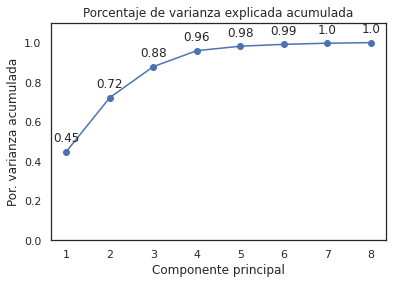

In [ ]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(X.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');


Si se empleasen únicamente las tres primeras componentes se conseguiría explicar el 88% de la varianza observada.

Aplicamos el PCA para reducir la dimensión de 8 a 3 variables.

In [ ]:
pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

El conjunto de entrenamiento quedó ahora con 3 variables de la siguiente manera:

In [ ]:
X_train.shape #conjunto de entrenamiento reducido de 8 a 3 variables

(213742, 3)

In [ ]:
#Lo mismo sucedió con el conjunto de pruebas X_test
X_test.shape

(1923680, 3)

#### **Modelo 1: DECISION TREE CLASSIFIER** 🌳

In [ ]:
from sklearn.tree import DecisionTreeClassifier #Modelo que vamos a utilizar: Arbol de Desicion 
from sklearn.model_selection import train_test_split # Lo utilizamos para dividir los datos en subconjuntos aleatorios de entrenamiento y test.
from sklearn import metrics # Lo vamos a utilizar para valuar la calidad de las predicciones de un modelo:
from sklearn.metrics import accuracy_score as acc #Para medir la precisión del subconjunto
from imblearn.over_sampling import SMOTE


In [ ]:
modelo1 = DecisionTreeClassifier(random_state=7,criterion='entropy', max_depth=9)  # Se aplica modelo clasificador Arbol de decisión con 9 nodos
modelo1.fit(X_train, y_train)

y_train_pred_tree = modelo1.predict(X_train)
print('Training accuracy on all features: %.3f' % acc(y_train, y_train_pred_tree))

y_test_pred_tree = modelo1.predict(X_test)
print('Testing accuracy on all features: %.3f' % acc(y_test, y_test_pred_tree))

Training accuracy on all features: 0.883
Testing accuracy on all features: 0.876


Se evalúa la capacidad predictiva del árbol calculando el accuracy en el conjunto de test y entrenamiento


El modelo es capaz de predecir con exactitud un 87 % de las observaciones del conjunto de test.

In [ ]:
preds1 = modelo1.predict(X_test)

Se crea **matriz de confusión** para evaluar el rendimiento del modelo de clasificación.

In [ ]:
confusion1 = metrics.confusion_matrix(y_test, preds1)
confusion1

array([[305570,  14971,      1,      0,      0,      0],
       [ 21749, 269010,  29858,     63,      0,      0],
       [     7,  16378, 270437,  33682,    139,      0],
       [     4,    403,  28860, 260890,  29884,    393],
       [    41,    316,    428,  47441, 261893,  10357],
       [     0,      0,      0,    164,   2759, 317982]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

<Figure size 720x1080 with 0 Axes>

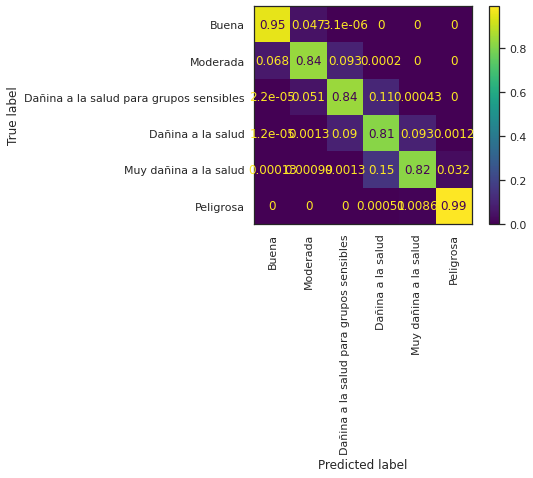

In [ ]:
import seaborn as sn
sns.set(style='white')
fig = plt.figure(figsize=(10,15))
metrics.plot_confusion_matrix(modelo1, X_test, y_test, normalize='true', values_format='.2g', display_labels=choicelist)
plt.xticks(rotation=90)

Aqui podemos ver que nuestro modelo tiene una precision excelente para las clases *Buena* y *Peligrosa*, y muy buena para las otras clases. 

In [ ]:
print(metrics.classification_report(y_test, preds1))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94    320542
           1       0.89      0.84      0.87    320680
           2       0.82      0.84      0.83    320643
           3       0.76      0.81      0.79    320434
           4       0.89      0.82      0.85    320476
           5       0.97      0.99      0.98    320905

    accuracy                           0.88   1923680
   macro avg       0.88      0.88      0.88   1923680
weighted avg       0.88      0.88      0.88   1923680



In [ ]:
import time
inicio = time.time()
modelo1.fit(X_train, y_train) 
fin = time.time()
intervalo = fin-inicio
print(f"El tiempo de entrenamiento de modelo {type(modelo1).__name__} es {intervalo:.2f} s")

El tiempo de entrenamiento de modelo DecisionTreeClassifier es 2.10 s


A modo de informacion calculamos cuanto tiempo demora el entrenamiento del modelo. 
El cual se ve una reducción considerable de tiempo en comparacion a las otras rondas de entrenamiento. 

#### **Modelo 2: RANDOM FOREST CLASSIFIER** 🌲🌳🌲🌳

In [ ]:
from sklearn.ensemble import RandomForestClassifier #Modelo que vamos a utilizar: Clasificador de bosque aleatorio 

In [ ]:
modelo2 = RandomForestClassifier(random_state=7, criterion= 'gini', max_depth=9, n_jobs=-1, max_features = 'sqrt') # Se utiliza como clasificador un bosque aleatorio
modelo2.fit(X_train, y_train)

y_train_pred_forest = modelo2.predict(X_train)
print('Training accuracy on all features: %.3f' % acc(y_train, y_train_pred_forest))

y_test_pred_forest = modelo2.predict(X_test)
print('Testing accuracy on all features: %.3f' % acc(y_test, y_test_pred_forest))

Training accuracy on all features: 0.882
Testing accuracy on all features: 0.878


Se evalúa la capacidad predictiva del árbol calculando el accuracy en el conjunto de test y entrenamiento


El modelo es capaz de predecir con exactitud un 88 % de las observaciones del conjunto de test.


In [ ]:
preds2 = modelo2.predict(X_test)
print(metrics.classification_report(y_test, preds2))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94    320542
           1       0.88      0.83      0.86    320680
           2       0.80      0.85      0.82    320643
           3       0.79      0.80      0.80    320434
           4       0.90      0.86      0.88    320476
           5       0.97      0.99      0.98    320905

    accuracy                           0.88   1923680
   macro avg       0.88      0.88      0.88   1923680
weighted avg       0.88      0.88      0.88   1923680



Se crea **matriz de confusión** para evaluar el rendimiento del modelo de clasificación.

In [ ]:
confusion2 = metrics.confusion_matrix(y_test, preds2)
confusion2

array([[298138,  22403,      0,      1,      0,      0],
       [ 17968, 267728,  34906,     76,      2,      0],
       [     4,  14304, 273070,  33127,    138,      0],
       [     4,    402,  34719, 255939,  29109,    261],
       [    33,    317,    704,  33604, 274682,  11136],
       [     0,      0,      0,    361,   1798, 318746]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

<Figure size 720x1080 with 0 Axes>

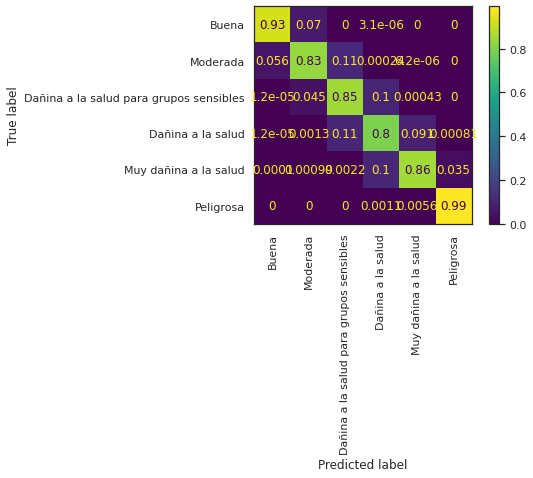

In [ ]:
import seaborn as sn
sns.set(style='white')
fig = plt.figure(figsize=(10,15))
metrics.plot_confusion_matrix(modelo2, X_test, y_test, normalize='true', display_labels=choicelist)
plt.xticks(rotation=90)

In [ ]:
import time
inicio = time.time()
modelo2.fit(X_train, y_train) 
fin = time.time()
intervalo = fin-inicio
print(f"El tiempo de entrenamiento de modelo {type(modelo2).__name__} es {intervalo:.2f} s")

El tiempo de entrenamiento de modelo RandomForestClassifier es 16.91 s


A modo de informacion calculamos cuanto tiempo demora el entrenamiento del modelo. Se puede observar una mejora de tiempo en comparación a otras rondas de entrenamiento.

#### **Modelo 3: XGBCLASSIFIER** 🧮

In [ ]:
import xgboost as xgb #Modelo que vamos a utilizar: Extreme gradient boosting - Refuerzo de gradientes extremo

In [ ]:
#Construyo el modelo y ajusto los datos.
modelo3 = xgb.XGBClassifier(random_state=7, max_depth=9, n_jobs=-1)
modelo3.fit(X_train, y_train)

# Realizo y evaluo las predicciones 
y_train_pred_xgb = modelo3.predict(X_train)
print('Training accuracy on all features: %.3f' % acc(y_train, y_train_pred_xgb))

y_test_pred_xgb = modelo3.predict(X_test)
print('Testing accuracy on all features: %.3f' % acc(y_test, y_test_pred_xgb))


Training accuracy on all features: 0.920
Testing accuracy on all features: 0.903


Se evalúa la capacidad predictiva del modelo calculando el accuracy en el conjunto de test y entrenamiento.


El modelo es capaz de predecir con exactitud un 90 % de las observaciones del conjunto de test.


In [ ]:
preds3 = modelo3.predict(X_test)
print(metrics.classification_report(y_test, preds3))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95    320542
           1       0.90      0.85      0.88    320680
           2       0.86      0.86      0.86    320643
           3       0.83      0.85      0.84    320434
           4       0.91      0.90      0.91    320476
           5       0.99      1.00      0.99    320905

    accuracy                           0.90   1923680
   macro avg       0.90      0.90      0.90   1923680
weighted avg       0.90      0.90      0.90   1923680



Se crea **matriz de confusión** para evaluar el rendimiento del modelo de clasificación.

In [ ]:
confusion3 = metrics.confusion_matrix(y_test, preds3)
confusion3

array([[306555,  13985,      1,      1,      0,      0],
       [ 21213, 274146,  25296,     25,      0,      0],
       [     4,  15522, 274691,  30346,     80,      0],
       [     8,    437,  20361, 272272,  27169,    187],
       [    44,    314,    412,  25196, 289976,   4534],
       [     0,      0,      0,      5,    791, 320109]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

<Figure size 720x1080 with 0 Axes>

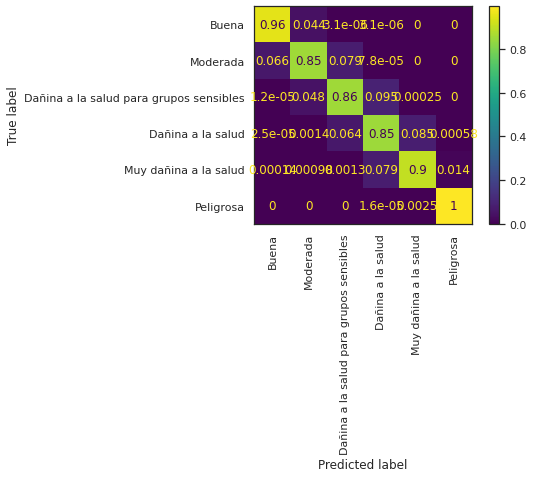

In [ ]:
import seaborn as sn
sns.set(style='white')
fig = plt.figure(figsize=(10,15))
metrics.plot_confusion_matrix(modelo3, X_test, y_test, normalize='true', display_labels=choicelist)
plt.xticks(rotation=90)

Aqui podemos ver que nuestro modelo tiene una precision excelente para todas las clases.

In [ ]:
import time
inicio = time.time()
modelo3.fit(X_train, y_train) 
fin = time.time()
intervalo = fin-inicio
print(f"El tiempo de entrenamiento de modelo {type(modelo3).__name__} es {intervalo:.2f} s")

El tiempo de entrenamiento de modelo XGBClassifier es 90.66 s


A modo de informacion calculamos cuanto tiempo demora el entrenamiento del modelo. 

**COMO CONCLUSION PARA ESTA CUARTA RONDA APLICANDO UNA ESTANDARIZACION DE LAS ESCALAS DE LAS VARIABLES Y UNA REDUCCION DE DIMENSIONES,  PODEMOS DECIR QUE, SI BIEN EN ALGUNOS MODELOS NO MEJORÓ  EL ACCURACY O LA PRECISION, ESTOS METODOS FUERON NECESARIOS PARA REDUCIR LA CANTIDAD DE CARACTERISTICAS PARA AUMENTAR LA INTERPRETABILIDAD DEL MODELO, DISMINUIR EL TIEMPO DE EJECUCIÓN Y AUMENTAR EL RENDIMIENTO DE GENERALIZACIÓN EN EL CONJUNTO DE PRUEBA.** ⏳




### **QUINTA RONDA**: ENTRENAMIENTO CON 8 VARIABLES APLICANDO MÉTODOS DE VALIDACIÓN CRUZADA

En esta quinta ronda de entrenamiento, vamos a entrenar uno de los modelos elegidos en la ronda anterior pero aplicando métodos de validación cruzada, para poder entender y describir si hay cambios en el performance del modelo. 

In [ ]:
# Importamos las librerias
from numpy import mean
from numpy import std
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE


In [ ]:
#Dividimos nuesteas variables en X e y 
X= pollution[['O3 Mean','CO Mean','SO2 Mean','NO2 Mean', 'O3 1st Max Value', 'CO 1st Max Value', 'SO2 1st Max Value', 'NO2 1st Max Value']].to_numpy()
y= pollution.Target.to_numpy(int)

sm = SMOTE(random_state=7) #Aplicamos SMOTE para equilibrar nuestros datos
X, y = sm.fit_resample(X, y) 

In [ ]:
#Creamos  el procedimiento STRATIFIES K-FOLD CROSS VALIDATION { 5-fold }
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
skf.get_n_splits(X, y)

5

In [ ]:
#Dividimos en train y test
train, test = list(skf.split(X, y))[0]

In [ ]:
cnt = 1
#El método split() genera índices para dividir los datos en conjuntos de entrenamiento y prueba.
for train, test in skf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train)}, Test set:{len(test)}')
    cnt+=1

Fold:1, Train set: 1709937, Test set:427485
Fold:2, Train set: 1709937, Test set:427485
Fold:3, Train set: 1709938, Test set:427484
Fold:4, Train set: 1709938, Test set:427484
Fold:5, Train set: 1709938, Test set:427484


La validación cruzada implementada mediante muestreo estratificado garantiza que la proporción de la característica de interés sea la misma en los datos originales, el conjunto de entrenamiento y el conjunto de prueba. Esto garantiza que ningún valor esté sobrerrepresentado o subrepresentado en los conjuntos de entrenamiento y prueba, lo que brinda una estimación más precisa del rendimiento/error.



In [ ]:
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(random_state=7, criterion= 'gini', max_depth=9, n_jobs=-1, max_features = 'sqrt')
# Lista para guardar accuracy
list_ac=[]

for i in range(0,skf.get_n_splits(X, y)):
  # Calculo de indices
  train, test = list(skf.split(X, y))[i]
  # Separar train y test
  X_train_n, y_train_n, X_test_n, y_test_n= X[train], y[train], X[test],y[test]
  # Ajustar el modelo
  model.fit(X_train_n, y_train_n)
  # Predicciones
  pred= model.predict(X_test_n)
  # Calculo del error
  accuracy= accuracy_score(y_true=y_test_n, y_pred= pred)
  print('Iteracion: ',i+1, ' Accuracy:', accuracy)
  list_ac.append(accuracy)
# Promedio de accuracy
print('Accuracy promedio:', np.mean(list_ac))

Iteracion:  1  Accuracy: 0.9508193269939296
Iteracion:  2  Accuracy: 0.949689462788168
Iteracion:  3  Accuracy: 0.9513081191342834
Iteracion:  4  Accuracy: 0.9522368088630218
Iteracion:  5  Accuracy: 0.950840265366657
Accuracy promedio: 0.9509787966292119


Tenemos un modelo bastante robusto entrenado en 5 pliegues y ha dado una precisión promedio del 95%. Ahora no debemos considerar esto como el modelo final. Porque hasta ahora, solo nos hemos centrado en la precisión general, y como ya hemos visto que se deben considerar otras metricas. Es decir este modelo debe evaluarse frente a varias métricas de rendimiento para garantizar la solidez del modelo. 